In [1]:
import sys
sys.path.append('..')

import pandas as pd
from math import log, log2, log10
import matplotlib.pyplot as plt

import chebyshevTheta as ct

In [2]:
df = pd.read_csv('../primes_100.csv', index_col=False)
df.head()

,primes
0,2
1,3
2,5
3,7
4,11


In [3]:
df['theta'] = ct.run(df['primes'])
df.head()

,primes,theta
0,2,0.693147
1,3,1.791759
2,5,3.401197
3,7,5.347108
4,11,7.745003


In [4]:
df['diff'] = df.apply(lambda row: row['primes'] - row['theta'], axis=1)
df.head()

,primes,theta,diff
0,2,0.693147,1.306853
1,3,1.791759,1.208241
2,5,3.401197,1.598803
3,7,5.347108,1.652892
4,11,7.745003,3.254997


In [5]:
df['prime/theta'] = df.apply(lambda row: row['primes'] / row['theta'], axis=1)
df.head()

,primes,theta,diff,prime/theta
0,2,0.693147,1.306853,2.885390
1,3,1.791759,1.208241,1.674332
2,5,3.401197,1.598803,1.470071
3,7,5.347108,1.652892,1.309119
4,11,7.745003,3.254997,1.420271


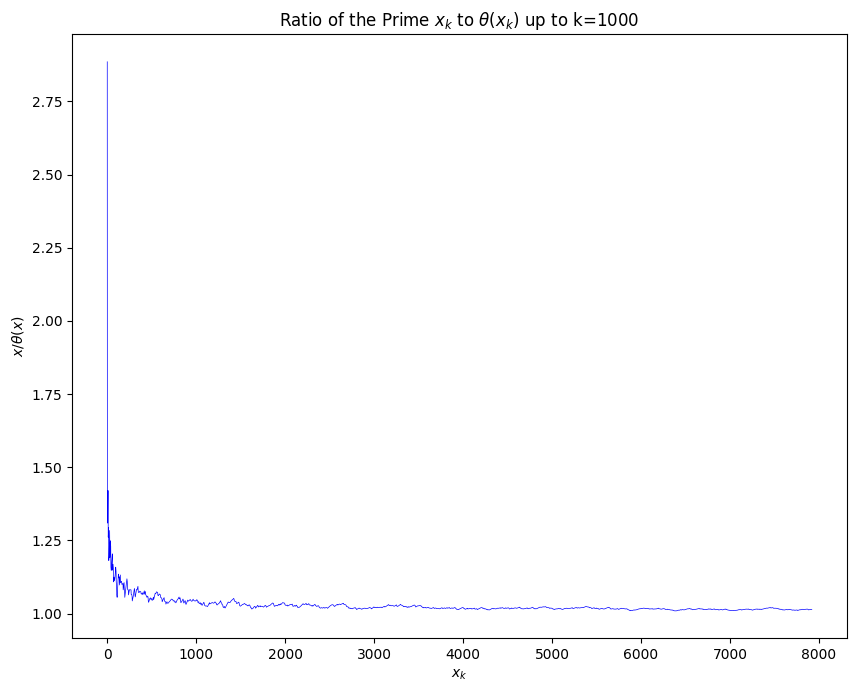

In [6]:
plt.figure(figsize=(10, 8), dpi=100)
# plt.plot(df['primes'], df['diff'], color='r')
plt.plot(df['primes'][:1000], df['prime/theta'][:1000], color='b', linewidth=0.5)

plt.title(r'Ratio of the Prime $x_k$ to $\theta(x_k)$ up to k=1000')
plt.xlabel(r'$x_k$')
plt.ylabel(r'$x / \theta(x)$')

# plt.savefig('k1000.jpeg')
plt.show()


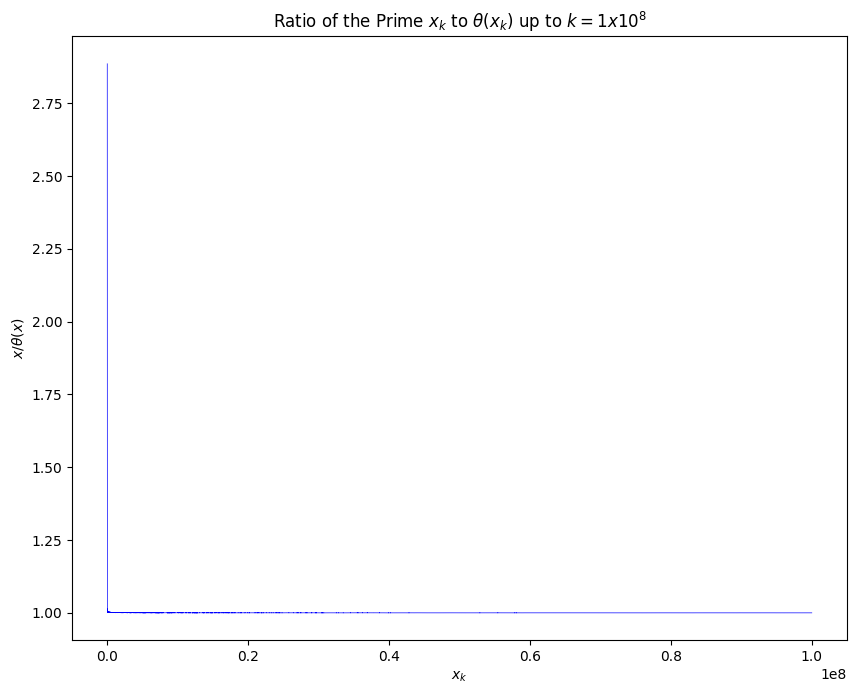

In [7]:
plt.figure(figsize=(10, 8), dpi=100)
# plt.plot(df['primes'], df['diff'], color='r')
plt.plot(df['primes'], df['prime/theta'], color='b', linewidth=0.5)

plt.title(r'Ratio of the Prime $x_k$ to $\theta(x_k)$ up to $k=1 x 10^{8}$')
plt.xlabel(r'$x_k$')
plt.ylabel(r'$x / \theta(x)$')

# plt.savefig('k100m.jpeg')
plt.show()

In [8]:
df['prime/theta'].describe()

count    5.761455e+06
mean     1.000234e+00
std      1.094731e-03
min      1.000062e+00
25%      1.000121e+00
50%      1.000151e+00
75%      1.000234e+00
max      2.885390e+00
Name: prime/theta, dtype: float64

In [9]:
df['deviance'] = df.apply(lambda row: row['diff'] / row['theta'], axis=1)
df

,primes,theta,diff,prime/theta,deviance
0,2,6.931472e-01,1.306853,2.885390,1.885390
1,3,1.791759e+00,1.208241,1.674332,0.674332
2,5,3.401197e+00,1.598803,1.470071,0.470071
3,7,5.347108e+00,1.652892,1.309119,0.309119
4,11,7.745003e+00,3.254997,1.420271,0.420271
...,...,...,...,...,...
5761450,99999931,9.998766e+07,12274.664708,1.000123,0.000123
5761451,99999941,9.998767e+07,12266.244028,1.000123,0.000123
5761452,99999959,9.998769e+07,12265.823348,1.000123,0.000123
5761453,99999971,9.998771e+07,12259.402667,1.000123,0.000123


In [10]:
df['deviance'].describe()

count    5.761455e+06
mean     2.337135e-04
std      1.094731e-03
min      6.197422e-05
25%      1.213430e-04
50%      1.511875e-04
75%      2.337300e-04
max      1.885390e+00
Name: deviance, dtype: float64

In [11]:
def upperBound(x: int) -> float:
    return x ** ((1 / 2) + 0.1)

In [14]:
df['O'] = df.apply(lambda row: upperBound(row['primes']) - row['diff'], axis=1)
df

,primes,theta,diff,prime/theta,deviance,O
0,2,6.931472e-01,1.306853,2.885390,1.885390,0.208864
1,3,1.791759e+00,1.208241,1.674332,0.674332,0.724942
2,5,3.401197e+00,1.598803,1.470071,0.470071,1.027725
3,7,5.347108e+00,1.652892,1.309119,0.309119,1.561203
4,11,7.745003e+00,3.254997,1.420271,0.420271,0.960372
...,...,...,...,...,...,...
5761450,99999931,9.998766e+07,12274.664708,1.000123,0.000123,50821.043618
5761451,99999941,9.998767e+07,12266.244028,1.000123,0.000123,50829.468084
5761452,99999959,9.998769e+07,12265.823348,1.000123,0.000123,50829.895579
5761453,99999971,9.998771e+07,12259.402667,1.000123,0.000123,50836.320802
